### Домашняя работа

**Задание простого уровня** Загрузите данные из файла `non_linear.csv` и сгенерируйте данные до степени *degree = 8* включительно. Обучите модель `sklearn.linear_model.Lasso` и модель `sklearn.linear_model.Ridge` на полученных данных, используйте коэффициент регуляризации $\alpha=0.8$ для обеих моделей. Постройте два столбчатых графика, на которых отобразите величину коэффициентов для Ridge регрессии и Lasso регрессии в виде столбиков.

Пример графиков для 3-й степени (просто для примера, у вас может по-другому выглядеть). Какой можно сделать в вывод по величине коэффициентов?:
![coeff_example](https://pp.userapi.com/c850136/v850136613/19282c/OfwruuxOkPw.jpg)

In [96]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge, Lasso

In [97]:
df = pd.read_csv('non_linear.csv')

X = PolynomialFeatures(8, include_bias=False).fit_transform(np.array(df['x_train']).reshape(-1, 1))
y = df['y_train']

ridge_model = Ridge(alpha=0.8).fit(X, y)
lasso_model = Lasso(alpha=0.8).fit(X, y)

c:\Users\miklj\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.335e+00, tolerance: 3.191e-03
  model = cd_fast.enet_coordinate_descent(


,Ridge,Lasso
0,0.505134,-0.000000
1,0.350113,-0.000000
2,-0.000103,-0.012366
3,-0.230029,-0.008771
4,0.069960,0.000934
5,-0.000687,0.000172
6,-0.001770,0.000004
7,0.000158,-0.000002


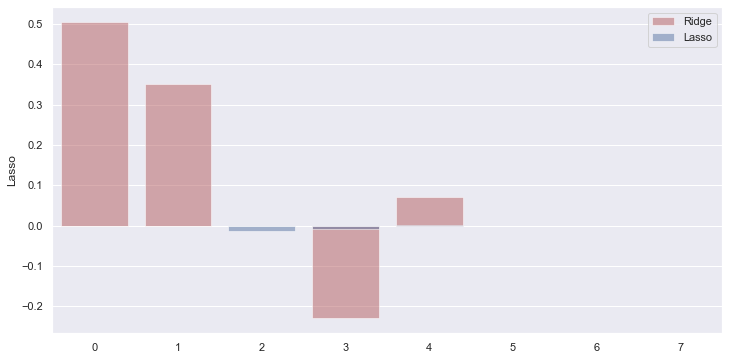

In [98]:
sns.set_theme()
fig, ax = plt.subplots(figsize=(12, 6))

coefs = pd.DataFrame({'Ridge': ridge_model.coef_, 'Lasso': lasso_model.coef_})
display(coefs)

sns.barplot(data=coefs, x=coefs.index, y='Ridge', label='Ridge', color='r', alpha=0.5)
sns.barplot(data=coefs, x=coefs.index, y='Lasso', label='Lasso', color='b', alpha=0.5)
ax.legend()

plt.show()

Пока что мы пользуемся моделями с регуляризацией как "черным ящиком" - знаем, как применять и это работает! Для успешного решения задач этого достаточно. Если вам, как и мне, интересно *почему* это работает - добро пожаловать во второй урок, где Вас ждёт больше кода и формул!